In [2]:
# Install required libraries
!pip install pandas numpy scikit-learn matplotli

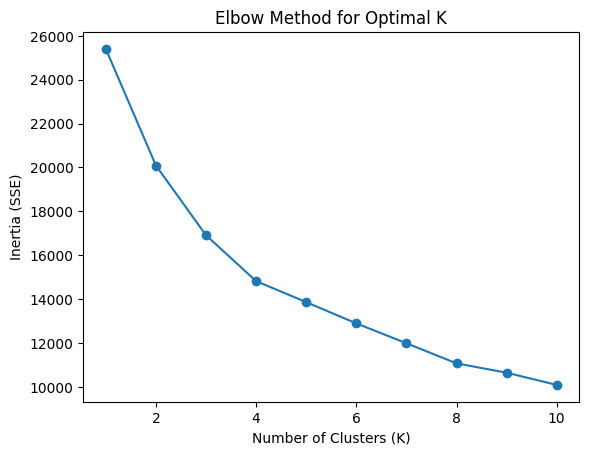

Clustered data saved to 'sales_clustered.csv'
Cluster
1          1183
2           907
0           733
Name: count, dtype: int64


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load dataset
sales = pd.read_csv('sales_data_sample.csv', encoding='latin1')

# Select only numerical columns for clustering
num_cols = sales.select_dtypes(include=[np.number])

# Handle missing values by replacing them with column mean
num_cols.fillna(num_cols.mean(), inplace=True)

# Standardize data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_cols)

# Determine the optimal number of clusters using Elbow Method
inertias = []
K_values = range(1, 11)
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(K_values, inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Choose the best K from the elbow curve (for example, K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
sales['Cluster'] = clusters

# Save the clustered dataset
sales.to_csv('sales_clustered.csv', index=False)
print("Clustered data saved to 'sales_clustered.csv'")

# Display first few rows with cluster labels
print(sales[['Cluster']].value_counts())
